In [1]:
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pylab as plt 
import matplotlib.lines as mlines
from matplotlib.legend import Legend
from pythonds.basic.stack import Stack
from math import *
from sklearn.neighbors import KDTree
import healpy as hp
from lrg_plot_functions import *
from lrg_sum_functions import *
from cosmo_Calc import *
from divideByTwo import *
from readData import *
from nearNeighbors import *
from localBKG import *
from scipy import stats
# from findRadius import *

In [2]:
# Reads in data files for use in readData.py

hdulist = fits.open('/Users/mtownsend/anaconda/Data/survey-dr5-specObj-dr14.fits') # this matches SDSS LRGs to DECaLS;
                                                                 # ONLY GIVES SOURCES THAT ARE IN SDSS AND DECALS
hdulist2 = fits.open('/Users/mtownsend/anaconda/Data/specObj-dr14.fits') # this is SDSS redshifts etc for LRGs
hdulist3 = fits.open('/Users/mtownsend/anaconda/Data/sweep-240p005-250p010.fits') # this is one sweep file of the DECaLS data

# hdulist = fits.open('/Users/mindy/Research/Data/lrgProjectData/survey-dr5-specObj-dr14.fits') # this matches SDSS LRGs to DECaLS;
#                                                                  # ONLY GIVES SOURCES THAT ARE IN SDSS AND DECALS
# hdulist2 = fits.open('/Users/mindy/Research/Data/lrgProjectData/specObj-dr14.fits') # this is SDSS redshifts etc for LRGs
# hdulist3 = fits.open('/Users/mindy/Research/Data/lrgProjectData/sweep-240p005-250p010.fits') # this is one sweep file of the DECaLS data


SpecObj_data = hdulist[1].data
SDSS_data = hdulist2[1].data
DECaLS_data = hdulist3[1].data

In [3]:
ra_LRG, dec_LRG, ra_BKG, dec_BKG, rmag_BKG, gmag_BKG, zmag_BKG, color_BKG, rmag_LRG, gmag_LRG, zmag_LRG, color_LRG, z_LRG = readData(SpecObj_data, SDSS_data, DECaLS_data)

print("end readdata")

length of sdss lrg array:  4851200
length of lrg only array: 1406221
length of row matched targets in SDSS and DECaLS:  4851200
length of DECaLS targets in brick:  4529240
length of id_ALL:  4529240
<class 'numpy.ndarray'>
length of id_MATCHED with LRG_cut (id_LRG): 1528
length of idcut: 4529240
length of idcut = 1 (is an LRG in DECaLS-only file): 1151
length of idcut = 0 (is not an LRG in DECaLS-only file): 4528089
length of z_lrg: 1151
end readdata


In [4]:
DTT_Gyr, age_Gyr, zage_Gyr, DCMR_Mpc, DCMR_Gyr, DA_Mpc, DA_Gyr, kpc_DA, DL_Mpc, DL_Gyr, V_Gpc = cosmoCalcfunc(z_LRG)

print("end cosmoCalc")

end cosmoCalc


In [5]:
row = 10
column = 10
# creates histogram for survey sources; excludes LRGs
H, xedges, yedges = np.histogram2d(rmag_BKG, color_BKG, normed=False)

# Uses the numbers counted in the histogram to calculate a surface density: For each cell, the number of sources
# divided by the area 
sd = H/(17.5 * (3600.**2.)) # converts 25 square degrees to square arcseconds

distance = 0.5

distance_kpc, near = nearNeighbor(distance, kpc_DA, ra_LRG, dec_LRG, ra_BKG, dec_BKG, rmag_BKG, color_BKG, xedges, yedges)

print('end nearNeighbor')

end nearNeighbor


In [6]:
distance_r2 = 5.
distance_r3 = 10.

numbkg, med_local, sigma, omega, Nbkg, r2, dist_r2, r3, dist_r3, zip_list_LRG, zip_list_BKG = localBKG_and_interlopers(distance_kpc, distance_r2, distance_r3, kpc_DA, ra_LRG, dec_LRG, ra_BKG, dec_BKG, rmag_BKG, color_BKG, xedges, yedges)

print("end interlopers")

end interlopers


In [ ]:
# sum_sigma_kpc1, error_kpc1, dist_outer_kpc1, radius_inner_kpc1, bkg_kpc1, dist_outer1, radius_outer_kpc1 = findRadius(5., 5.2, kpc_DA, ra_LRG, dec_LRG, ra_BKG, dec_BKG, rmag_BKG, color_BKG, xedges, yedges)
# sum_sigma_kpc2, error_kpc2, dist_outer_kpc2, radius_inner_kpc2, bkg_kpc2, dist_outer2, radius_outer_kpc2 = findRadius(5.2, 5.4, kpc_DA, ra_LRG, dec_LRG, ra_BKG, dec_BKG, rmag_BKG, color_BKG, xedges, yedges)
# sum_sigma_kpc3, error_kpc3, dist_outer_kpc3, radius_inner_kpc3, bkg_kpc3, dist_outer3, radius_outer_kpc3 = findRadius(5.4, 5.6, kpc_DA, ra_LRG, dec_LRG, ra_BKG, dec_BKG, rmag_BKG, color_BKG, xedges, yedges)
# sum_sigma_kpc4, error_kpc4, dist_outer_kpc4, radius_inner_kpc4, bkg_kpc4, dist_outer4, radius_outer_kpc4 = findRadius(5.6, 5.8, kpc_DA, ra_LRG, dec_LRG, ra_BKG, dec_BKG, rmag_BKG, color_BKG, xedges, yedges)
# sum_sigma_kpc5, error_kpc5, dist_outer_kpc5, radius_inner_kpc5, bkg_kpc5, dist_outer5, radius_outer_kpc5 = findRadius(5.8, 6., kpc_DA, ra_LRG, dec_LRG, ra_BKG, dec_BKG, rmag_BKG, color_BKG, xedges, yedges)
# sum_sigma_kpc6, error_kpc6, dist_outer_kpc6, radius_inner_kpc6, bkg_kpc6, dist_outer6, radius_outer_kpc6 = findRadius(6., 6.2, kpc_DA, ra_LRG, dec_LRG, ra_BKG, dec_BKG, rmag_BKG, color_BKG, xedges, yedges)
# sum_sigma_kpc7, error_kpc7, dist_outer_kpc7, radius_inner_kpc7, bkg_kpc7, dist_outer7, radius_outer_kpc7 = findRadius(6.2, 6.4, kpc_DA, ra_LRG, dec_LRG, ra_BKG, dec_BKG, rmag_BKG, color_BKG, xedges, yedges)
# sum_sigma_kpc8, error_kpc8, dist_outer_kpc8, radius_inner_kpc8, bkg_kpc8, dist_outer8, radius_outer_kpc8 = findRadius(6.4, 6.6, kpc_DA, ra_LRG, dec_LRG, ra_BKG, dec_BKG, rmag_BKG, color_BKG, xedges, yedges)
# sum_sigma_kpc9, error_kpc9, dist_outer_kpc9, radius_inner_kpc9, bkg_kpc9, dist_outer9, radius_outer_kpc9 = findRadius(6.6, 6.8, kpc_DA, ra_LRG, dec_LRG, ra_BKG, dec_BKG, rmag_BKG, color_BKG, xedges, yedges)
# sum_sigma_kpc10, error_kpc10, dist_outer_kpc10, radius_inner_kpc10, bkg_kpc10, dist_outer10, radius_outer_kpc10 = findRadius(6.8, 7., kpc_DA, ra_LRG, dec_LRG, ra_BKG, dec_BKG, rmag_BKG, color_BKG, xedges, yedges)

# sumSigma = [sum_sigma_kpc1, sum_sigma_kpc2, sum_sigma_kpc3, sum_sigma_kpc4, sum_sigma_kpc5, sum_sigma_kpc6, sum_sigma_kpc7, sum_sigma_kpc8, sum_sigma_kpc9, sum_sigma_kpc10]
# radius = [dist_outer_kpc1, dist_outer_kpc2, dist_outer_kpc3, dist_outer_kpc4, dist_outer_kpc5, dist_outer_kpc6, dist_outer_kpc7, dist_outer_kpc8, dist_outer_kpc8, dist_outer_kpc10]
    
# plt.scatter(radius, sumSigma)
# plt.show()


In [7]:
Nsat = np.array(near) - np.array(Nbkg)
print("end Nsat")

end Nsat


In [8]:
sumsat, sumsat1z, sumsat2z, sumsat3z, sumsat4z, sumsat5z, sumsat6z, sumsat7z, sumsat1r, sumsat2r, sumsat3r, sumsat4r, sumsat5r, sumsat6r, sumsat7r, sumsat1g, sumsat2g, sumsat3g, sumsat4g, sumsat5g, sumsat6g, sumsat7g, sumsat8g, sumsat1_zmag, sumsat2_zmag, sumsat3_zmag, sumsat4_zmag, sumsat5_zmag, sumsat6_zmag, sumsat7_zmag  = sumNsat(Nsat, z_LRG, rmag_LRG, gmag_LRG, zmag_LRG)

sumnear, sumnear1z, sumnear2z, sumnear3z, sumnear4z, sumnear5z, sumnear6z, sumnear7z, sumnear1r, sumnear2r, sumnear3r, sumnear4r, sumnear5r, sumnear6r, sumnear7r, sumnear1g, sumnear2g, sumnear3g, sumnear4g, sumnear5g, sumnear6g, sumnear7g, sumnear8g, sumnear1_zmag, sumnear2_zmag, sumnear3_zmag, sumnear4_zmag, sumnear5_zmag, sumnear6_zmag, sumnear7_zmag = sumNN(near, z_LRG, rmag_LRG, gmag_LRG, zmag_LRG)

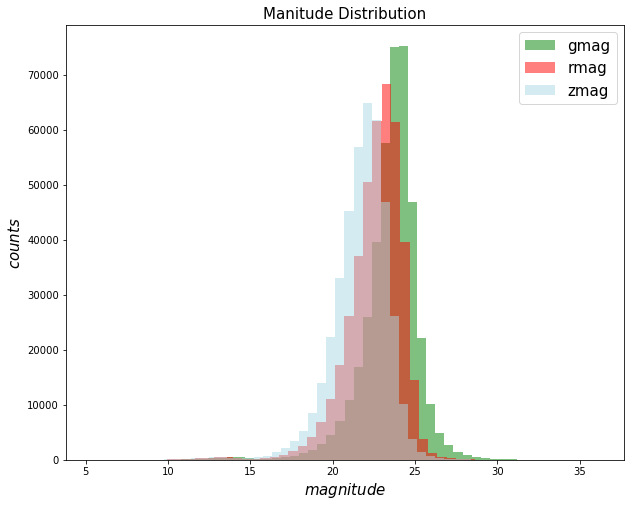

In [15]:
magHist(gmag_BKG, rmag_BKG, zmag_BKG)
plt.show()

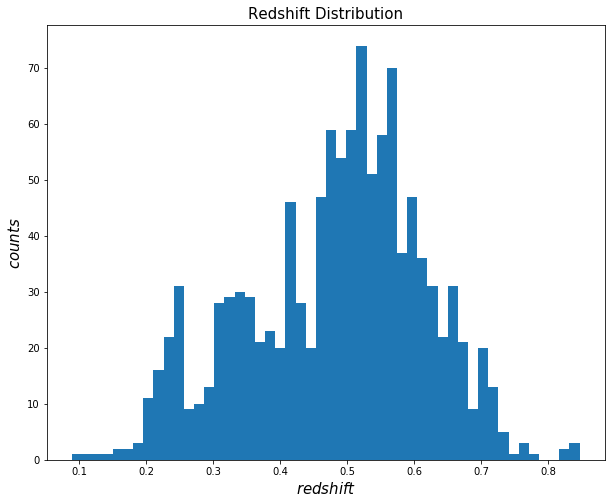

In [16]:
zHist(z_LRG)
plt.show()

mean number of satellites is 16.393863307269044
median number of satellites is 14.27
standard deviation of satellites is 26.05054032751309
standard error is 0.7681885249561131


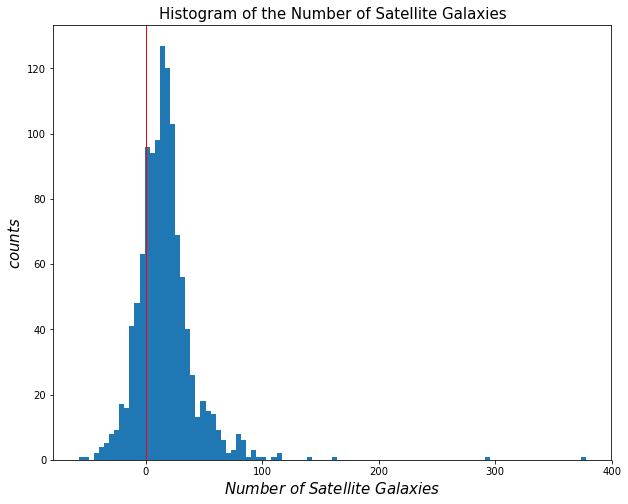

In [33]:
from lrg_plot_functions import *
totalNsat(Nsat)
plt.savefig("/Users/mtownsend/anaconda/GitHub/lrg-project/Plots/LRG_science_plots/NsatHist.pdf")
# plt.savefig("/Users/mindy/Research/Plots/LRG_Project_Plots/NsatHist.pdf")
plt.show()

mean number of interlopers is 41.82507674485954
median number of interlopers is 35.17333333333334
standard deviation of interloper is 26.290921583497664
standard error is 0.7752769814771803


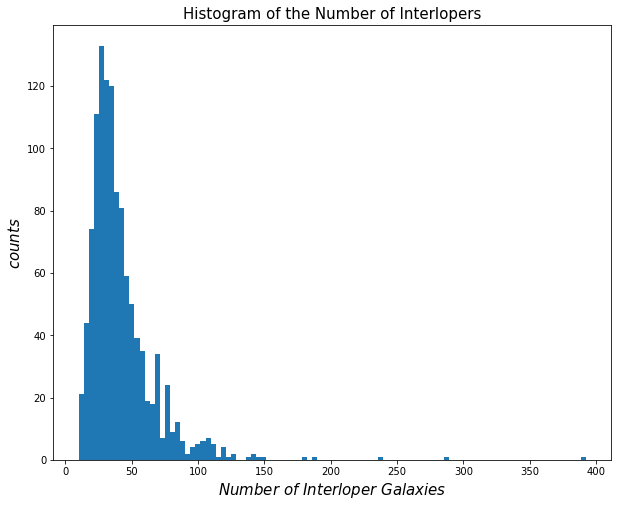

In [9]:
totalNbkg(Nbkg)

plt.savefig("/Users/mtownsend/anaconda/GitHub/lrg-project/Plots/LRG_science_plots/bkgHist.pdf")

plt.show()

mean number of near neighbors is 58.21894005212858
median number of near neighbors is 50.0
standard deviation of near neighbor is 42.82393619172537
standard error is 1.262808984472097


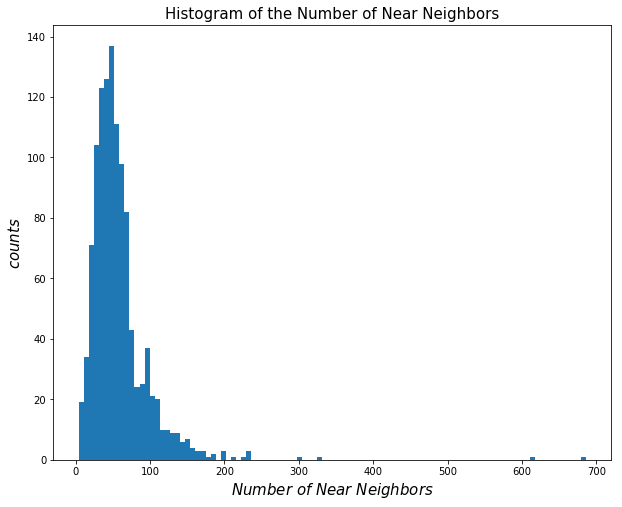

In [11]:
totalNear(near)

plt.savefig("/Users/mtownsend/anaconda/GitHub/lrg-project/Plots/LRG_science_plots/nearHist.pdf")

plt.show()

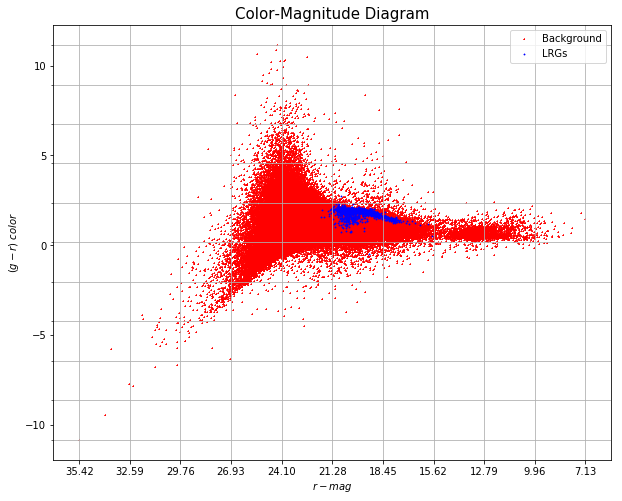

In [20]:
cmd(rmag_BKG, color_BKG, rmag_LRG, color_LRG, xedges, yedges)
plt.show()

The median of Nsat: 14.27
The median of bootmed: 14.27
Low 68% confidence interval: 13.770000000000012
High 68% confidence interval: 14.693333333333339


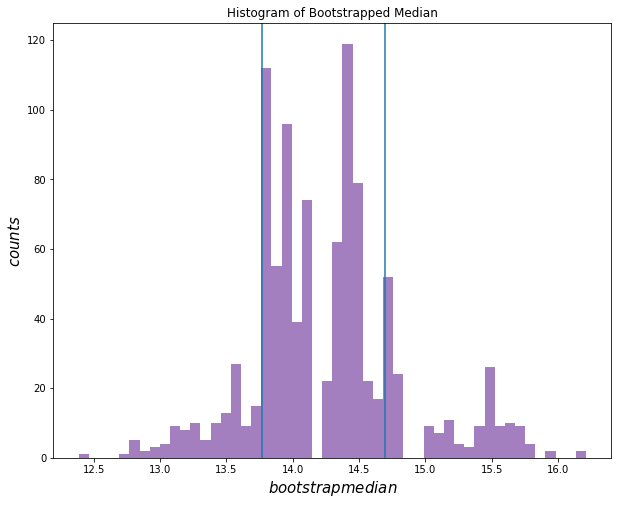

In [12]:
boot_med_plot(1000, 0.68, np.median, sumsat)
plt.savefig("/Users/mtownsend/anaconda/GitHub/lrg-project/Plots/LRG_science_plots/boothist.pdf")
plt.show()

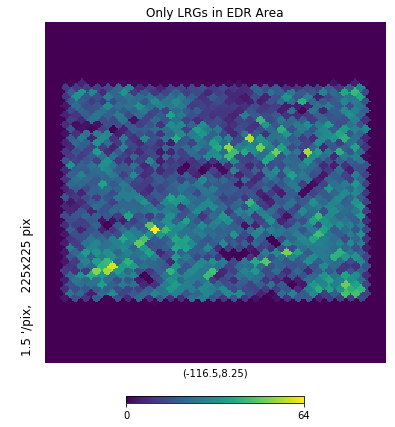

In [9]:
from lrg_plot_functions import *
healpix(ra_BKG, dec_BKG, ra_LRG, dec_LRG, gmag_BKG, rmag_BKG, zmag_BKG)
# plt.savefig("/Users/mtownsend/anaconda/GitHub/lrg-project/Plots/LRG_science_plots/healpix1.pdf")
plt.savefig("/Users/mtownsend/anaconda/GitHub/lrg-project/Plots/LRG_science_plots/healpix2.pdf")
plt.show()

mean number of satellites at z < 0.2: 93.27791666666667
mean number of satellites at 0.2 <= z < 0.3: 30.168773584905658
mean number of satellites at 0.3 <= z < 0.4: 20.667899807321774
mean number of satellites at 0.4 <= z < 0.5: 14.227852684144821
mean number of satellites at 0.5 <= z < 0.6: 12.231111111111112
mean number of satellites at 0.6 <= z < 0.7: 11.110119760479044
mean number of satellites at z < 0.7: 7.0530081300813015
total number of Nsat arrays: 1151


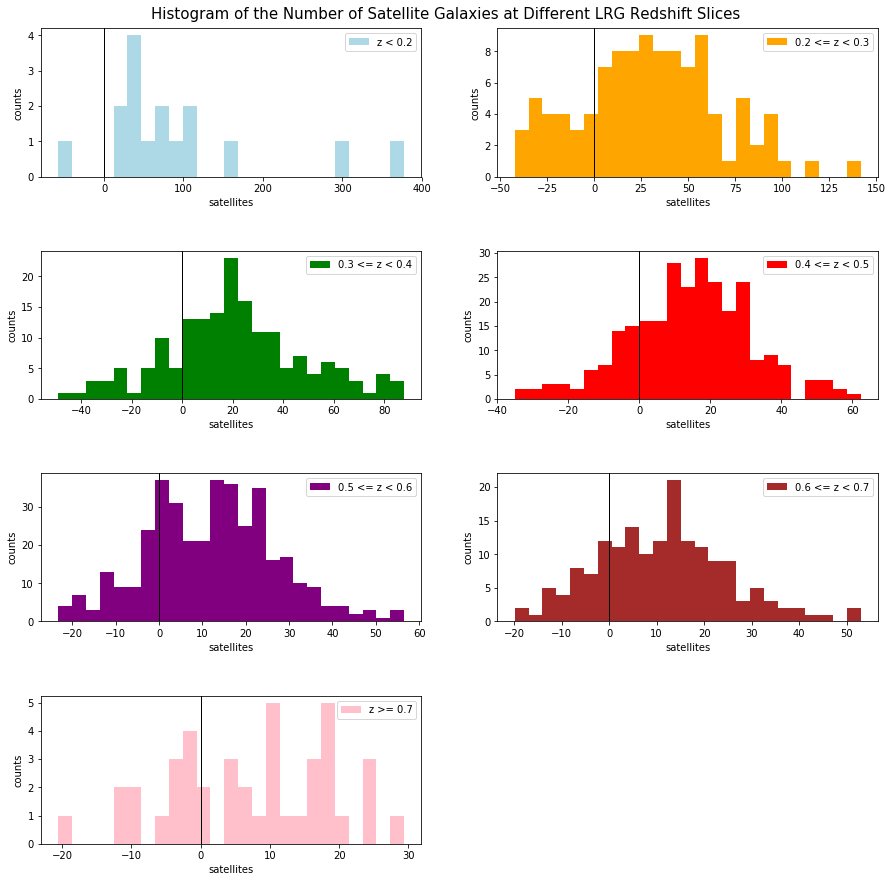

In [13]:
z_cut_Nsat(z_LRG, Nsat)

plt.savefig("/Users/mindy/Research/Plots/LRG_Project_Plots/Nsat_z_hist.pdf")

plt.show()